In [ ]:
# ======= Variables =========

# Fill in the variables below and run cell first
# Note: Use forward slashes / instead of backslashes \ in file paths

RAW_CSV_FILE_PATH = 'C:/cal-housing-prices/dataset/housing.csv' 

CLEANED_CSV_FILE_PATH = 'C:/cal-housing-prices/dataset/housing_cleaned.csv'



In [6]:
# ========= Libraries =========

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Load the dataset

df = pd.read_csv(RAW_CSV_FILE_PATH)

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Cleanup, Pre-processing

In [53]:
# Remove rows with missing values
df = df.dropna()

# Reset the dataframe indices
df = df.reset_index(drop=True)

In [54]:
# Remove duplicate rows
df = df.drop_duplicates()

# Reset the dataframe indices
df = df.reset_index(drop=True)

In [55]:
# Check for any duplicates of 'longitude' and 'latitude' columns

duplicates = df.duplicated(subset=['longitude', 'latitude'])

# Print the rows that are duplicates
print(df[duplicates])

# There are duplicates of 'longitude' and 'latitude' columns, but the accuracy of the values is only at two decimal digits, 
# which could refer to different blocks. Therefore, we will keep all the values.

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
7        -122.25     37.84                52.0       3104.0           687.0   
9        -122.25     37.84                52.0       3549.0           707.0   
11       -122.26     37.85                52.0       3503.0           752.0   
...          ...       ...                 ...          ...             ...   
20390    -121.58     39.16                33.0       1897.0           378.0   
20391    -121.58     39.15                38.0       1756.0           396.0   
20392    -121.56     39.16                35.0       2157.0           441.0   
20393    -121.57     39.16                18.0       1632.0           367.0   
20408    -121.54     39.08                23.0       1076.0           216.0   

       population  households  median_income  media

In [56]:
# Multiply median_income by 10000 to transform it to US dollars

df.loc[:, 'median_income'] = df['median_income'] * (10 ** 4)

In [57]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND


In [38]:
# Outlier detection
# Plot a bar chart and a boxplot for the values of each column

def plotSortedBarChart(dataframe, column_name):
    """
    Create a bar chart of a dataframe column values sorted in ascending order.

    """
    # Sort the values in ascending order
    sorted_values = dataframe[column_name].sort_values()
    
    # Create bar plot
    plt.figure(figsize=(12, 6))
    
    plt.bar(range(len(sorted_values)), sorted_values)
    
    plt.title(f'Values of:   {column_name}', fontsize=15)
    plt.xlabel('index', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

def plotBoxplot(dataframe, column_name):
    """
    Create a boxplot of a dataframe column values.

    """
    
    # Create box plot
    plt.figure(figsize=(10, 6))

    plt.boxplot(dataframe[column_name])
    
    plt.title(f'Box Plot of: {column_name}', fontsize=15)
    plt.ylabel(column_name, fontsize=12)
        
    # Show the plot
    plt.tight_layout()
    plt.show()



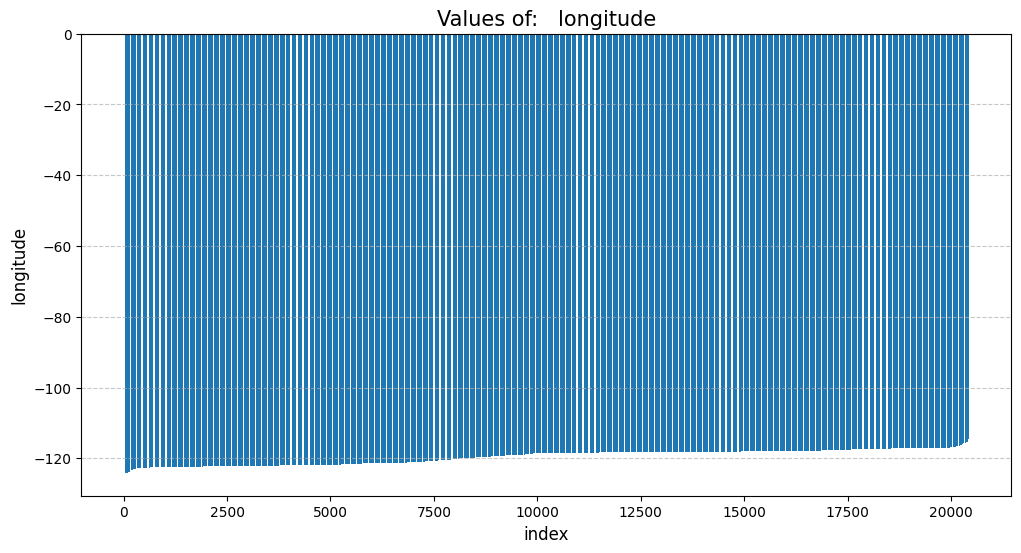

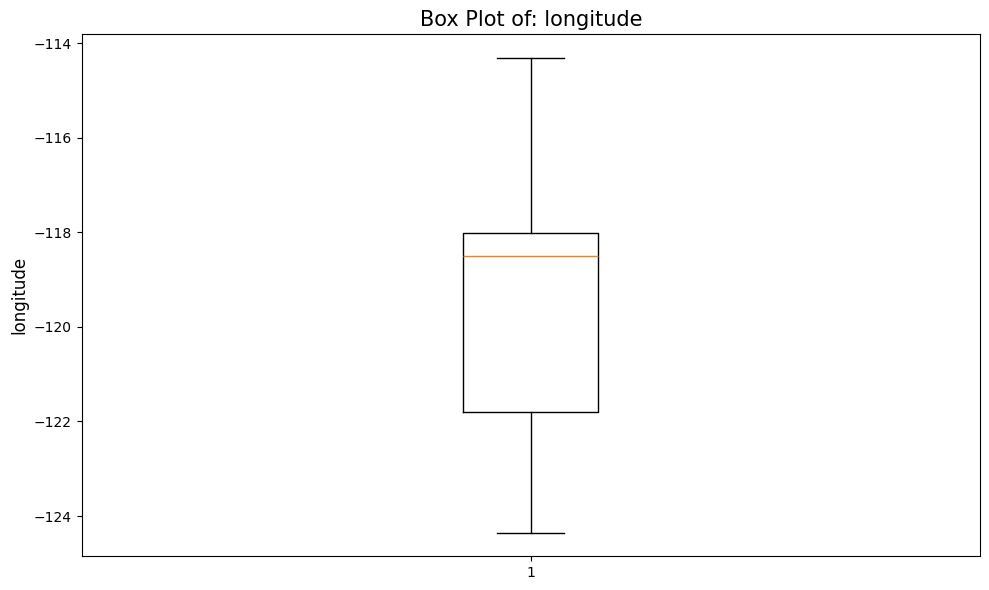

In [39]:
# longitude

plotSortedBarChart(df, 'longitude')
plotBoxplot(df, 'longitude')

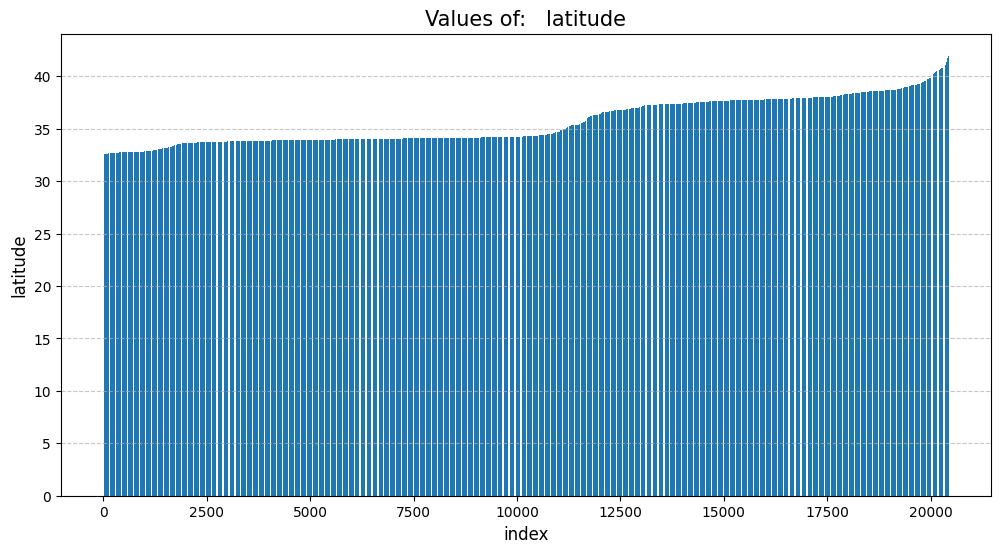

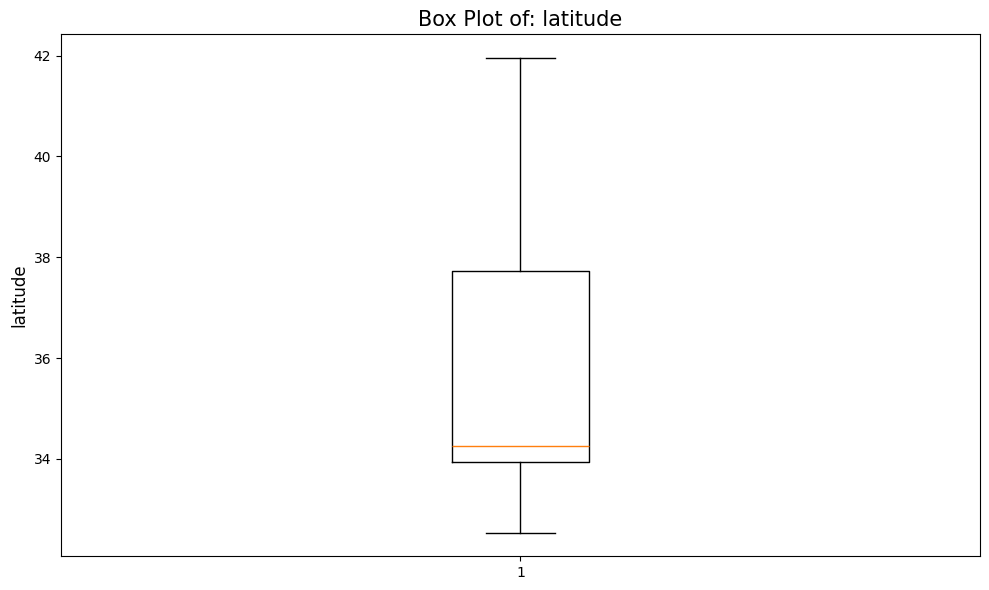

In [40]:
# latitude

plotSortedBarChart(df, 'latitude')
plotBoxplot(df, 'latitude')

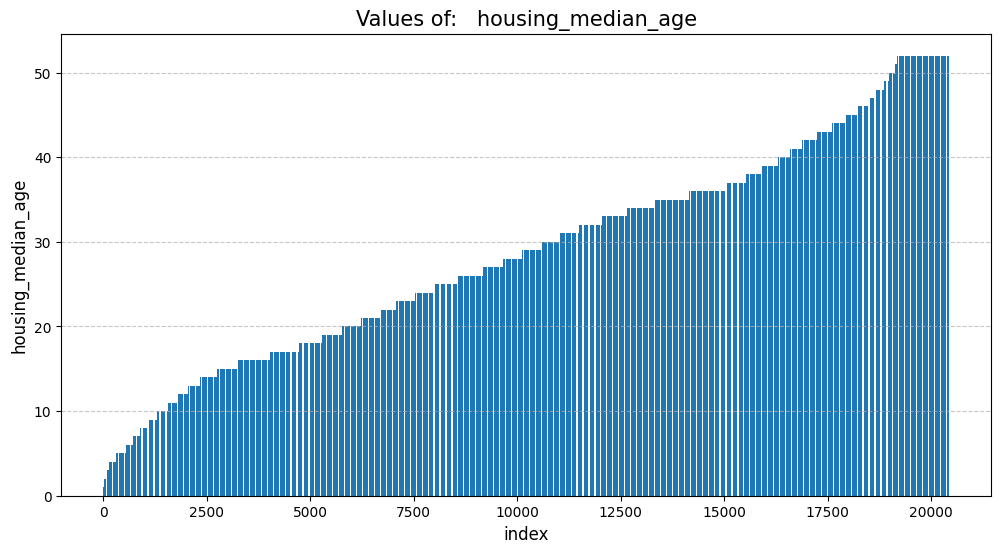

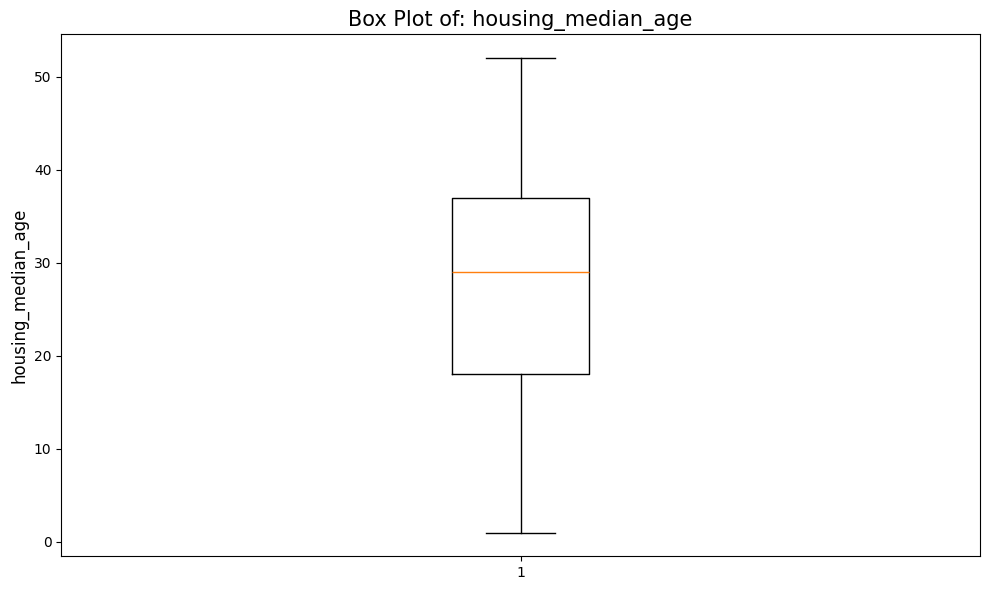

In [41]:
# housing_median_age

plotSortedBarChart(df, 'housing_median_age')
plotBoxplot(df, 'housing_median_age')

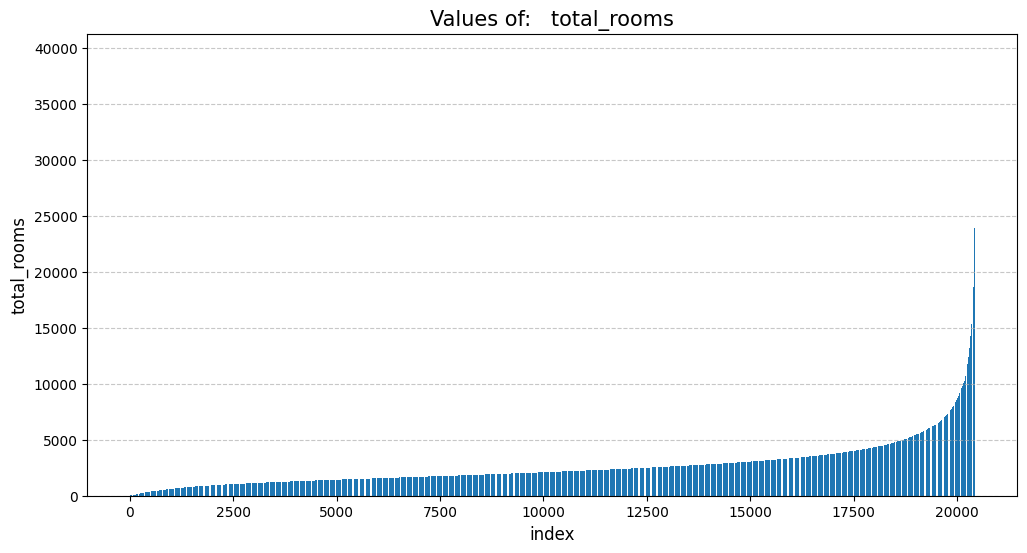

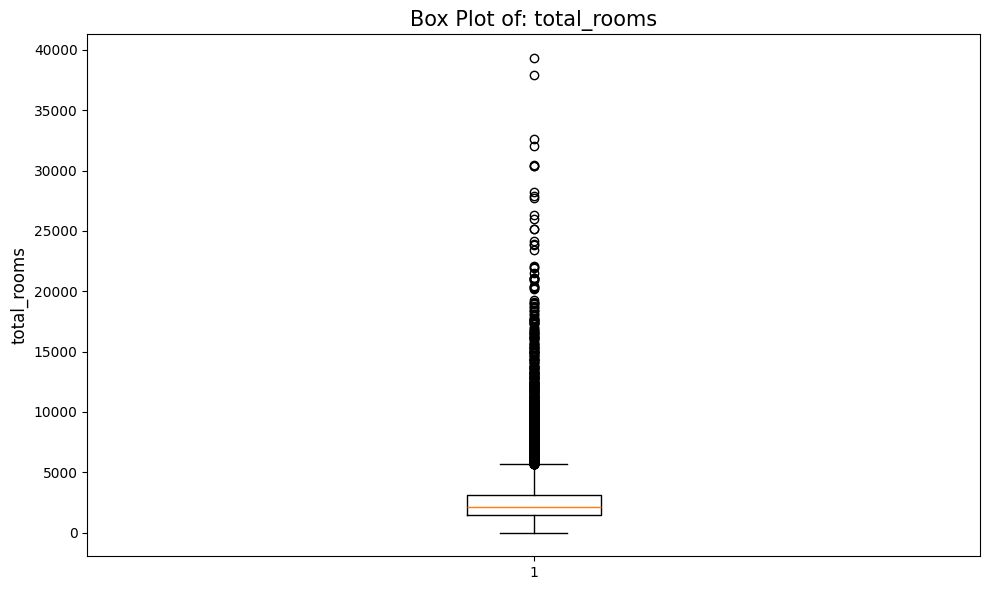

In [50]:
# total_rooms

plotSortedBarChart(df, 'total_rooms')
plotBoxplot(df, 'total_rooms')

In [58]:
# Get the rows with 'total_rooms' values greater than 10000

df[df['total_rooms'] > 10000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,59849.0,371000.0,NEAR BAY
566,-122.24,37.72,5.0,18634.0,2885.0,7427.0,2718.0,76110.0,350700.0,NEAR BAY
572,-122.06,37.77,12.0,14316.0,2045.0,5781.0,2007.0,72634.0,341600.0,NEAR BAY
858,-122.01,37.57,14.0,16199.0,2993.0,8117.0,2847.0,58322.0,281800.0,NEAR BAY
859,-122.04,37.58,14.0,14917.0,2708.0,8012.0,2606.0,56277.0,269800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20246,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,69712.0,321300.0,<1H OCEAN
20322,-121.78,38.55,12.0,10509.0,2186.0,5633.0,2138.0,29605.0,204300.0,INLAND
20323,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,31371.0,201800.0,INLAND
20356,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,31250.0,132500.0,INLAND


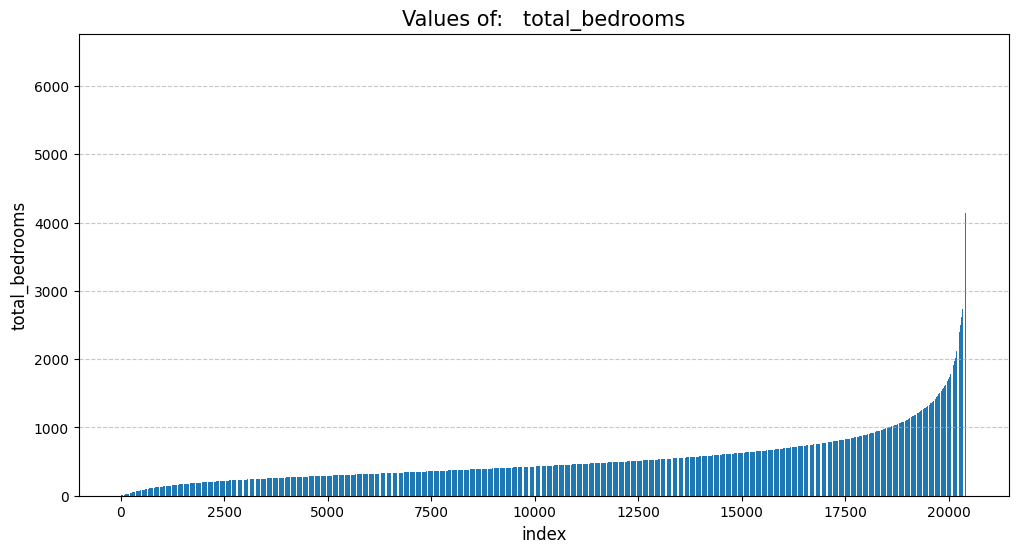

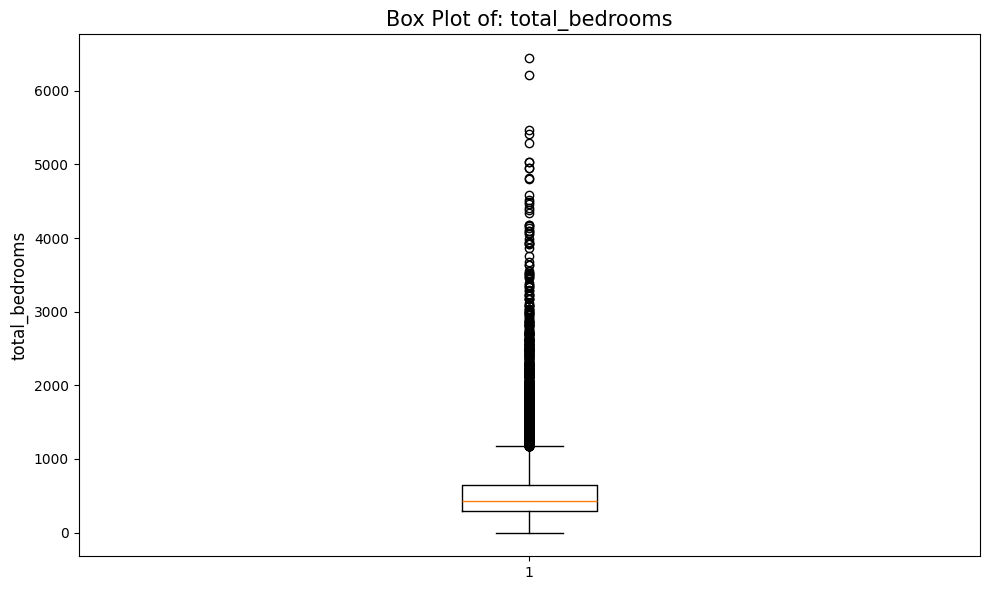

In [59]:
# total_bedrooms

plotSortedBarChart(df, 'total_bedrooms')
plotBoxplot(df, 'total_bedrooms')

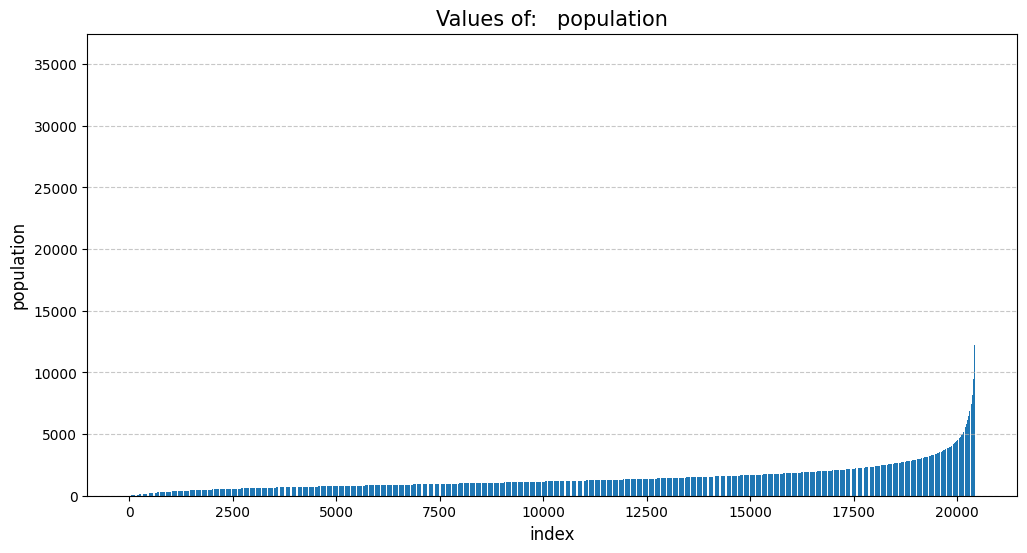

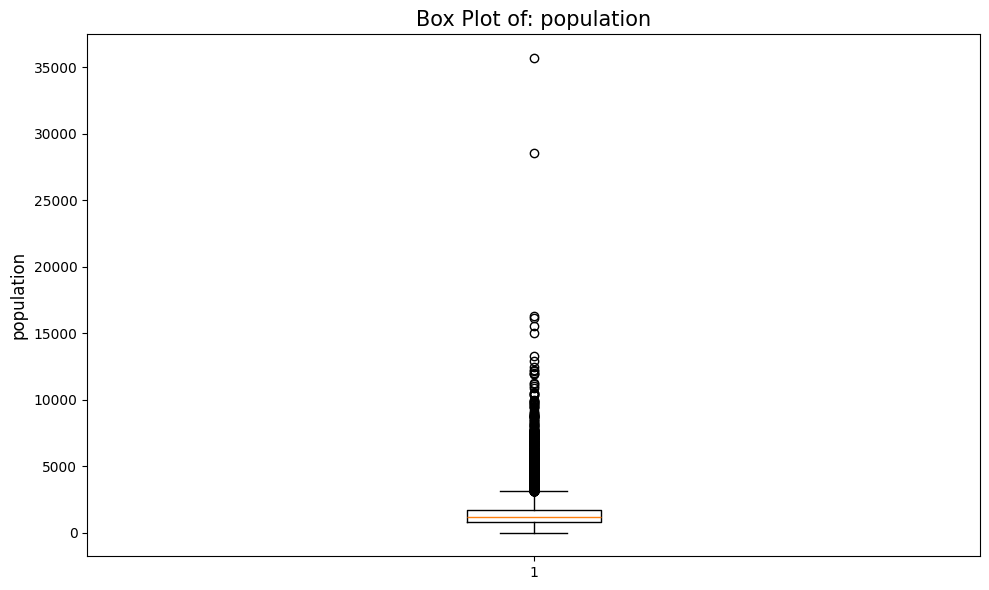

In [60]:
# population

plotSortedBarChart(df, 'population')
plotBoxplot(df, 'population')

In [61]:
# Get the rows with 'population' values greater than 20000

df[df['population'] > 20000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9782,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,23087.0,118800.0,<1H OCEAN
15212,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,25729.0,134400.0,<1H OCEAN


In [62]:
# Remove the rows with 'population' values greater than 20000

df = df[df['population'] <= 20000].reset_index(drop=True)

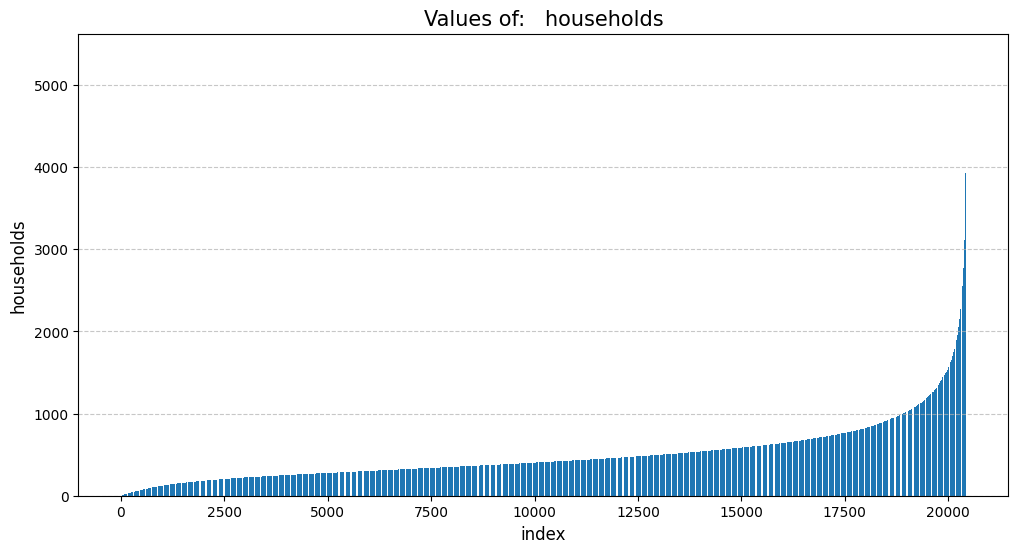

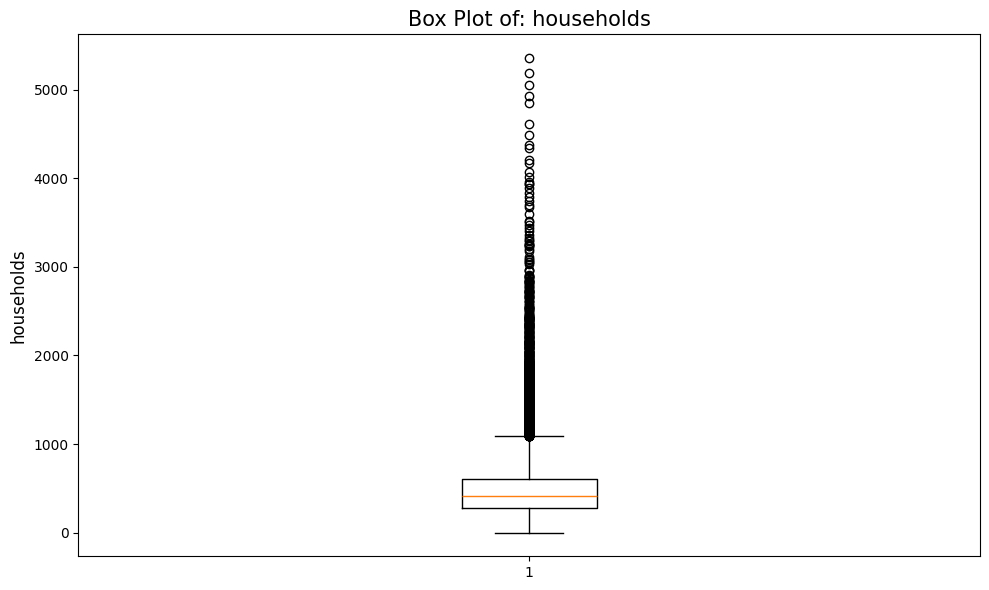

In [64]:
# households

plotSortedBarChart(df, 'households')
plotBoxplot(df, 'households')

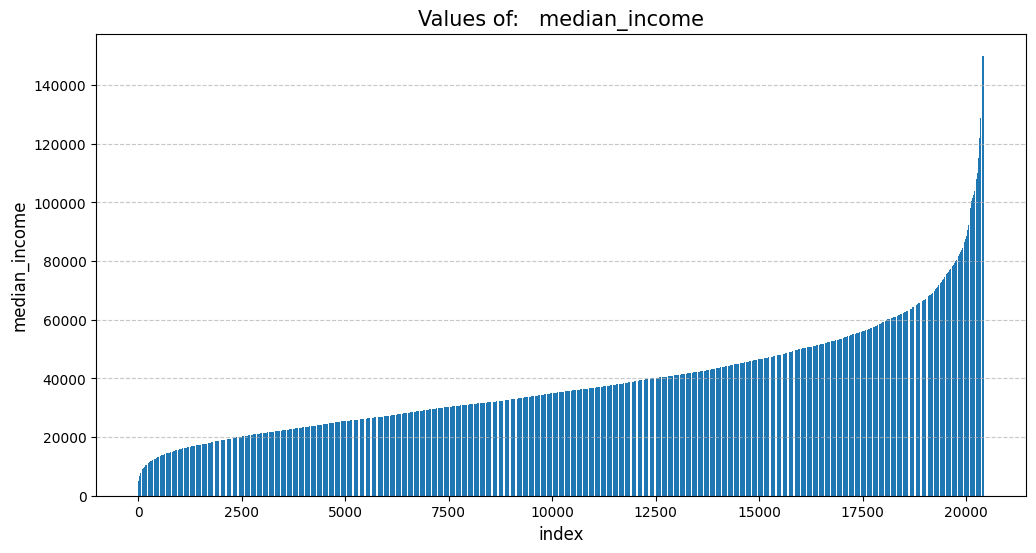

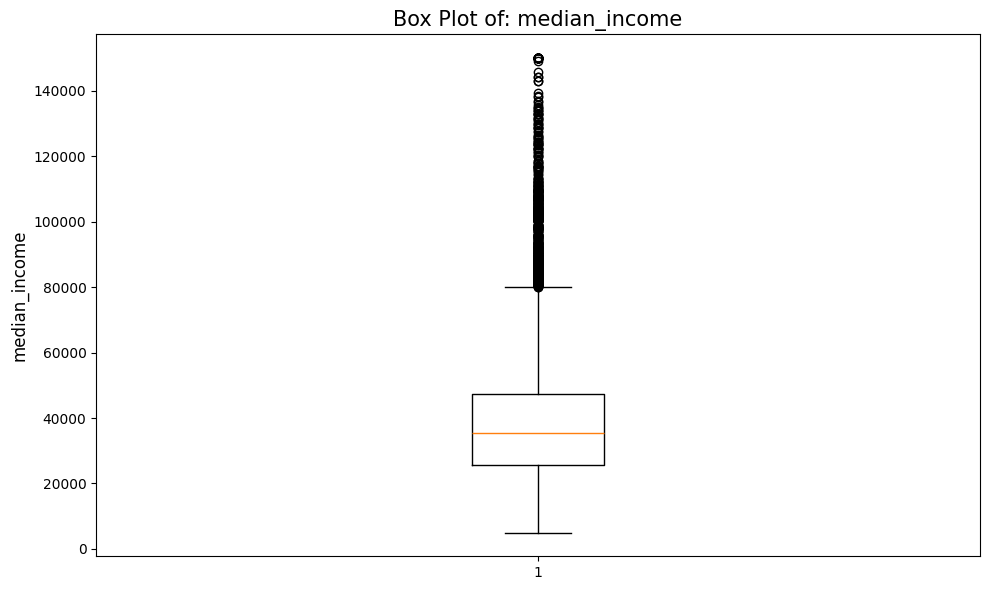

In [65]:
# median_income

plotSortedBarChart(df, 'median_income')
plotBoxplot(df, 'median_income')

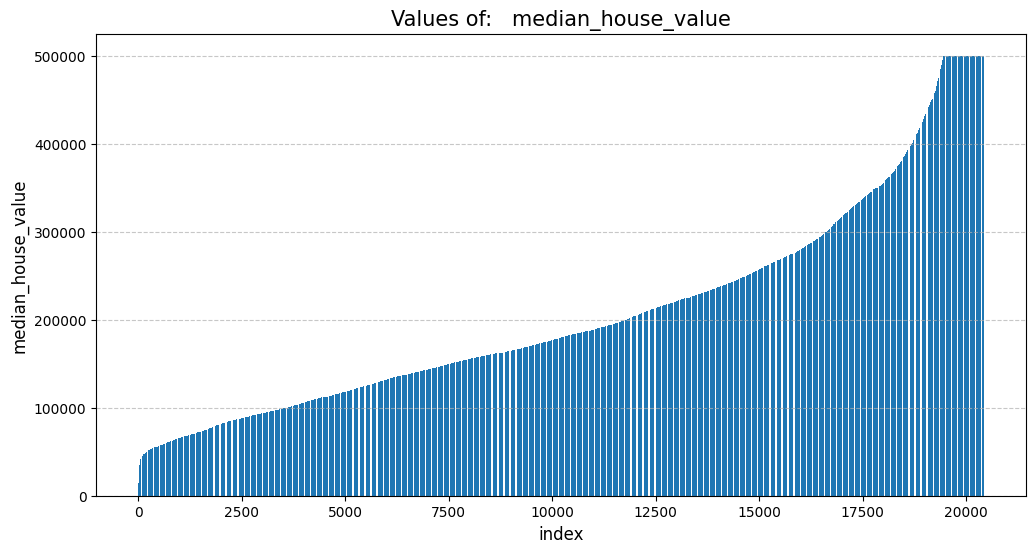

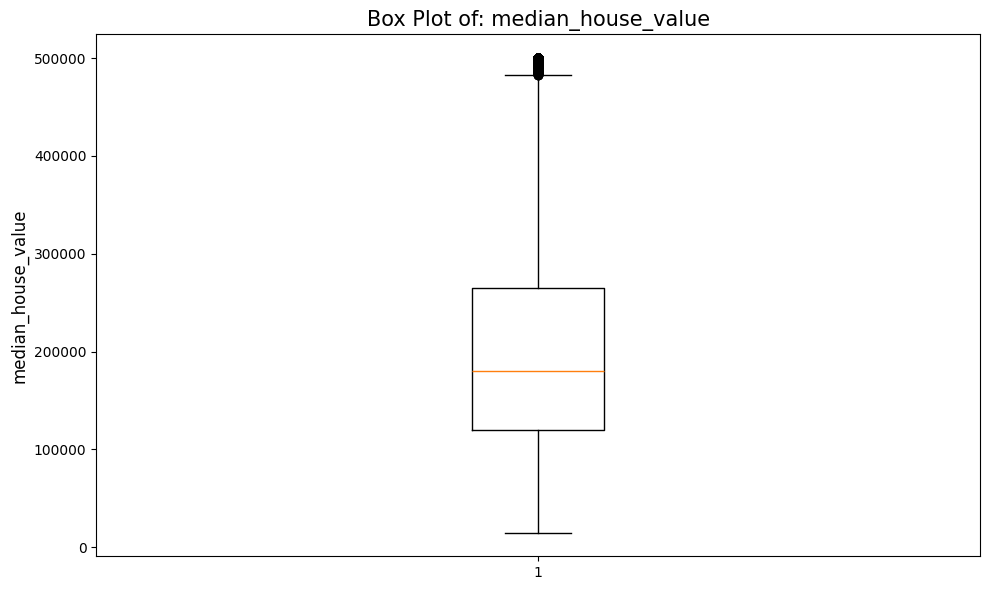

In [66]:
# median_house_value

plotSortedBarChart(df, 'median_house_value')
plotBoxplot(df, 'median_house_value')

ocean_proximity
<1H OCEAN     9032
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64


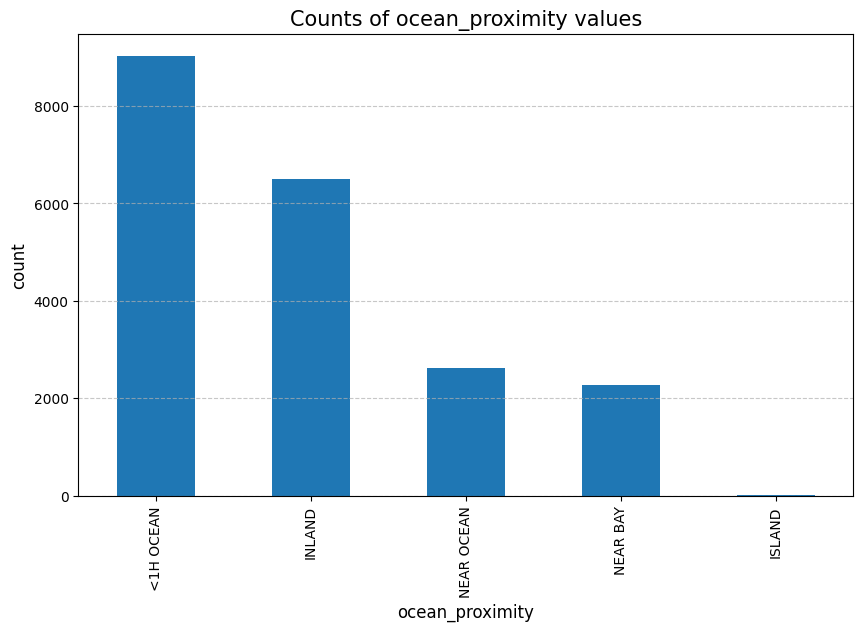

In [68]:
# Get the different values of 'ocean_proximity' column and their counts

print(df['ocean_proximity'].value_counts())

# Plot a bar chart of the 'ocean_proximity' column values

plt.figure(figsize=(10, 6))

df['ocean_proximity'].value_counts().plot(kind='bar')

plt.title('Counts of ocean_proximity values', fontsize=15)

plt.xlabel('ocean_proximity', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [69]:
# Remove the rows with 'ocean_proximity' values of 'ISLAND'

df = df[df['ocean_proximity'] != 'ISLAND'].reset_index(drop=True)

In [72]:
# Save the cleaned dataset to a new CSV file

df.to_csv(CLEANED_CSV_FILE_PATH, index=False)